<a href="https://colab.research.google.com/github/Anshuldogra001/Stock_Market_Capestone_Project/blob/main/Stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
! pip3 install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [174]:
import pandas as pd
import plotly.express as px
from prophet import Prophet
import yfinance as yf
import plotly.io as pio
pio.renderers.default = 'colab'
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt

In [175]:
Tesla=yf.Ticker("TSLA")

In [176]:
df=Tesla.history(period="max")

In [177]:
df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date']).dt.date
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3236 entries, 0 to 3235
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3236 non-null   datetime64[ns]
 1   Open          3236 non-null   float64       
 2   High          3236 non-null   float64       
 3   Low           3236 non-null   float64       
 4   Close         3236 non-null   float64       
 5   Volume        3236 non-null   int64         
 6   Dividends     3236 non-null   float64       
 7   Stock Splits  3236 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 202.4 KB


In [179]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...,...
3231,2023-05-01,163.169998,163.279999,158.830002,161.830002,109015000,0.0,0.0
3232,2023-05-02,161.880005,165.490005,158.929993,160.309998,128259700,0.0,0.0
3233,2023-05-03,160.009995,165.000000,159.910004,160.610001,119728000,0.0,0.0
3234,2023-05-04,162.710007,162.949997,159.649994,161.199997,95108500,0.0,0.0


In [180]:
px.area(df, x="Date", y="Close")

In [181]:
px.line(df, x="Date", y="Close")

In [182]:
px.area(df, x="Date", y="Volume")

In [183]:
px.bar(df,y="Volume")

In [184]:
px.box(df,y="Close")

In [ ]:
import seaborn as sns
# Generate histogram of a specific column
sns.histplot(data=df, x='Close')
plt.show()



In [ ]:
# Generate pairplot of all columns
sns.pairplot(df)
plt.show()

In [185]:
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [186]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

data  = requests.get(url).text

In [187]:
soup = BeautifulSoup(data, 'html5lib')

In [188]:
tesla_revenue = pd.DataFrame(columns=["Date","Revenue"])

for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    Date = col[0].text
    Revenue = col[1].text
    tesla_revenue = tesla_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)

<ipython-input-188-caf972addd1f>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-188-caf972addd1f>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-188-caf972addd1f>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-188-caf972addd1f>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-188-caf972addd1f>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-188-caf972addd1f>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

In [189]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

<ipython-input-189-2aef5327de36>:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [190]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [191]:
tesla_revenue.tail(5)

,Date,Revenue
9,2013,2013
10,2012,413
11,2011,204
12,2010,117
13,2009,112


In [192]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [193]:
make_graph(df, tesla_revenue, 'Tesla')

In [194]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...,...
3231,2023-05-01,163.169998,163.279999,158.830002,161.830002,109015000,0.0,0.0
3232,2023-05-02,161.880005,165.490005,158.929993,160.309998,128259700,0.0,0.0
3233,2023-05-03,160.009995,165.000000,159.910004,160.610001,119728000,0.0,0.0
3234,2023-05-04,162.710007,162.949997,159.649994,161.199997,95108500,0.0,0.0


In [195]:
Columns=["Date","Close"]
ndf=pd.DataFrame(df,columns=Columns)

In [196]:
ndf

,Date,Close
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000
...,...,...
3231,2023-05-01,161.830002
3232,2023-05-02,160.309998
3233,2023-05-03,160.610001
3234,2023-05-04,161.199997


In [197]:
prophet_df=ndf.rename(columns={"Date":"ds", "Close":"y"})
prophet_df

,ds,y
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000
...,...,...
3231,2023-05-01,161.830002
3232,2023-05-02,160.309998
3233,2023-05-03,160.610001
3234,2023-05-04,161.199997


In [198]:
m=Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbv1y756n/_nc04hv5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbv1y756n/3cb_ayuz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61349', 'data', 'file=/tmp/tmpbv1y756n/_nc04hv5.json', 'init=/tmp/tmpbv1y756n/3cb_ayuz.json', 'output', 'file=/tmp/tmpbv1y756n/prophet_modelq0lubxi3/prophet_model-20230506061840.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:18:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:18:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [199]:
future=m.make_future_dataframe(periods=30)
forcast=m.predict(future)

In [200]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-06-29,-0.906403,-45.351597,31.293533,-0.906403,-0.906403,-5.110143,-5.110143,-5.110143,-0.489734,-0.489734,-0.489734,-4.620409,-4.620409,-4.620409,0.0,0.0,0.0,-6.016545
1,2010-06-30,-0.898235,-46.628798,36.176597,-0.898235,-0.898235,-4.886516,-4.886516,-4.886516,-0.456322,-0.456322,-0.456322,-4.430194,-4.430194,-4.430194,0.0,0.0,0.0,-5.784751
2,2010-07-01,-0.890068,-45.246724,34.333347,-0.890068,-0.890068,-4.935607,-4.935607,-4.935607,-0.695374,-0.695374,-0.695374,-4.240232,-4.240232,-4.240232,0.0,0.0,0.0,-5.825675
3,2010-07-02,-0.881901,-46.531350,33.305079,-0.881901,-0.881901,-4.966059,-4.966059,-4.966059,-0.912866,-0.912866,-0.912866,-4.053193,-4.053193,-4.053193,0.0,0.0,0.0,-5.847960
4,2010-07-06,-0.849232,-44.240660,34.338462,-0.849232,-0.849232,-3.871206,-3.871206,-3.871206,-0.489734,-0.489734,-0.489734,-3.381472,-3.381472,-3.381472,0.0,0.0,0.0,-4.720438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,2023-05-31,255.875130,209.155254,286.859159,255.875130,255.875130,-6.460185,-6.460185,-6.460185,-0.456322,-0.456322,-0.456322,-6.003863,-6.003863,-6.003863,0.0,0.0,0.0,249.414945
3262,2023-06-01,255.922542,209.591690,290.377932,255.922542,255.922542,-6.694773,-6.694773,-6.694773,-0.695374,-0.695374,-0.695374,-5.999399,-5.999399,-5.999399,0.0,0.0,0.0,249.227768
3263,2023-06-02,255.969953,207.090223,289.242395,255.969953,255.969953,-6.910278,-6.910278,-6.910278,-0.912866,-0.912866,-0.912866,-5.997412,-5.997412,-5.997412,0.0,0.0,0.0,249.059675
3264,2023-06-03,256.017365,212.280171,293.495347,256.017365,256.017365,-4.746836,-4.746836,-4.746836,1.251993,1.251993,1.251993,-5.998828,-5.998828,-5.998828,0.0,0.0,0.0,251.270529


In [201]:
px.line(forcast, x="ds", y="yhat")

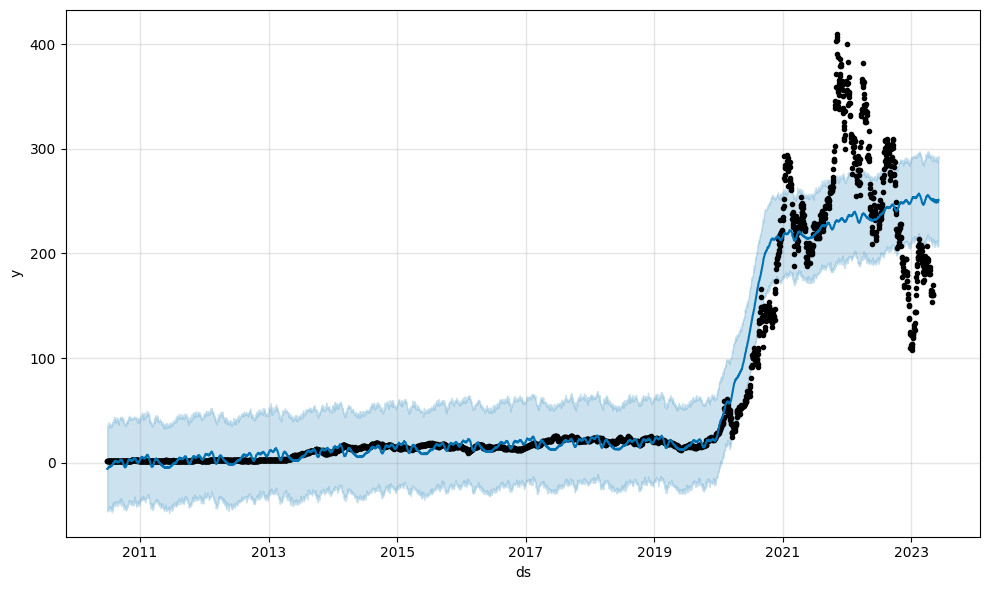

In [202]:
figure=m.plot(forcast, xlabel='ds', ylabel='y')

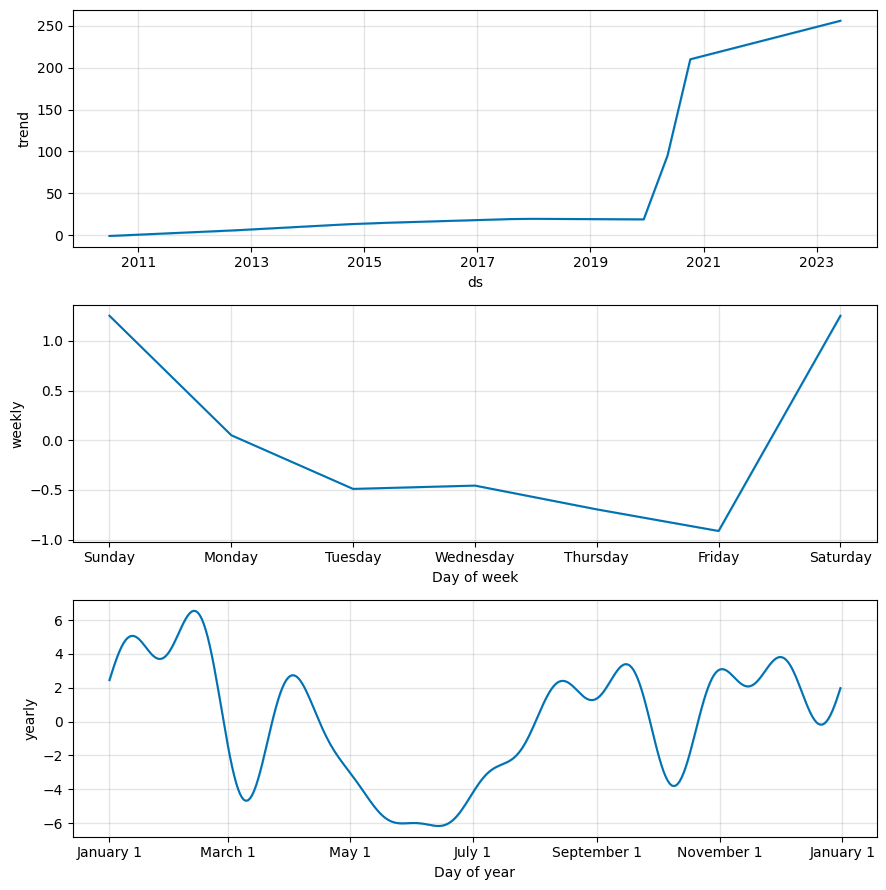

In [203]:
figure2=m.plot_components(forcast)

In [204]:
# from google.colab import files
# forcast.to_csv("forecast.csv")
# files.download("forecast.csv")

In [205]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import tensorflow as tf
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, TimeDistributed, RepeatVector
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [206]:
df.set_index('Date', inplace=True)

In [207]:

d= df.drop(['Volume','Low', 'Dividends', 'Stock Splits'], axis=1)
d.head()

,Open,High,Close
Date,,,
2010-06-29,1.266667,1.666667,1.592667
2010-06-30,1.719333,2.028000,1.588667
2010-07-01,1.666667,1.728000,1.464000
2010-07-02,1.533333,1.540000,1.280000
2010-07-06,1.333333,1.333333,1.074000


In [208]:
dataset = d.values
dataset = dataset.astype('float64')
dataset[:5]

array([[1.26666701, 1.66666698, 1.59266698],
       [1.71933305, 2.02800012, 1.58866704],
       [1.66666698, 1.72800004, 1.46399999],
       [1.53333294, 1.53999996, 1.27999997],
       [1.33333302, 1.33333302, 1.074     ]])

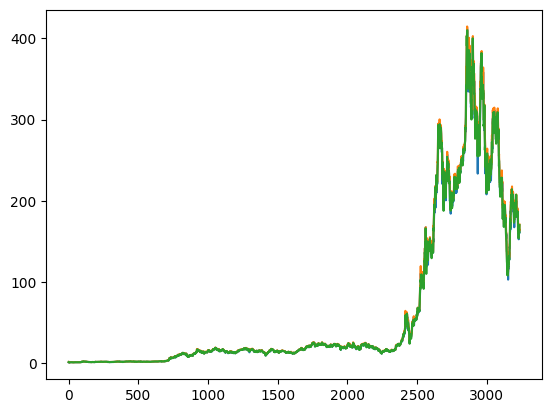

In [209]:
plt.plot(dataset)
plt.show()

In [210]:
scaler = MinMaxScaler(feature_range = (0,1))
dataset = scaler.fit_transform(dataset)
print(dataset[:5],'\n')
print(dataset.shape)

[[4.64595078e-04 1.34982138e-03 1.31893362e-03]
 [1.56759864e-03 2.22389882e-03 1.30915180e-03]
 [1.43926814e-03 1.49818819e-03 1.00428027e-03]
 [1.11437537e-03 1.04340943e-03 5.54310805e-04]
 [6.27038990e-04 5.43474885e-04 5.05407544e-05]] 

(3236, 3)


In [211]:
def create_dataset(dataset, n_step_in, n_step_out):
    data_x, data_y = [],[] #data_x is data and data_y is label
    for i in range(len(dataset)-n_step_in-1): #we want if data be beyond len(sequendatasetce), the command will not continue
        data_x.append(dataset[i:(i+n_step_in),:])
        data_y.append(dataset[i+n_step_in:i+n_step_in+n_step_out,:])
    return np.array(data_x) , np.array(data_y)

In [212]:
train_size = int(len(dataset) * 0.80)
train , test = dataset[0:train_size] , dataset[train_size:len(dataset)]
print(train.shape)
print(test.shape)

(2588, 3)
(648, 3)


In [213]:
n_step_in , n_step_out = 4 , 2 #timestep or look_up

train_x , train_y = create_dataset(train, n_step_in, n_step_out)
test_x , test_y = create_dataset(test, n_step_in, n_step_out)

In [214]:
print(train_x.shape , train_y.shape)
print(test_x.shape , test_y.shape)

(2583, 4, 3) (2583, 2, 3)
(643, 4, 3) (643, 2, 3)


In [215]:
n_features = train_x.shape[2]
n_features

3

In [216]:
from keras.optimizers import Adam,RMSprop,Adamax
#stack lstm
model = Sequential()
model.add(LSTM(100,activation = 'relu',input_shape=(n_step_in,n_features)))   
model.add(RepeatVector(n_step_out))   
model.add(LSTM(50,activation = 'relu',return_sequences=True))   
model.add(TimeDistributed(Dense(n_features)))
optimizer = Adamax(learning_rate=0.001)
model.compile(optimizer=optimizer,loss='mse')   

In [217]:

#verbose is the choice that how you want to see the output of your Nural Network while it's training. If you set verbose = 0, It will show nothing
model.fit(train_x, train_y, epochs=35, shuffle=False, batch_size=2)

Epoch 1/35
1292/1292 [==============================] - 22s 14ms/step - loss: 5.1506e-04
Epoch 2/35
1292/1292 [==============================] - 18s 14ms/step - loss: 0.0012
Epoch 3/35
1292/1292 [==============================] - 14s 11ms/step - loss: 5.3271e-04
Epoch 4/35
1292/1292 [==============================] - 10s 8ms/step - loss: 2.5358e-04
Epoch 5/35
1292/1292 [==============================] - 10s 8ms/step - loss: 1.2644e-04
Epoch 6/35
1292/1292 [==============================] - 11s 8ms/step - loss: 7.8017e-05
Epoch 7/35
1292/1292 [==============================] - 10s 8ms/step - loss: 5.7584e-05
Epoch 8/35
1292/1292 [==============================] - 9s 7ms/step - loss: 5.2755e-05
Epoch 9/35
1292/1292 [==============================] - 10s 8ms/step - loss: 4.9982e-05
Epoch 10/35
1292/1292 [==============================] - 11s 8ms/step - loss: 4.8187e-05
Epoch 11/35
1292/1292 [==============================] - 11s 8ms/step - loss: 4.7331e-05
Epoch 12/35
1292/1292 [=========

In [218]:
model.save('savedata')

In [219]:
# loading model
model = tf.keras.models.load_model('savedata')

In [220]:
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

21/21 [==============================] - 0s 4ms/step


In [221]:
print('predicted y(train):', predict_train[:2],'\n')
print('real y(train):', train_y[:2])

predicted y(train): [[[0.02355835 0.02381169 0.02422493]
  [0.02679159 0.02669436 0.02823987]]

 [[0.02334537 0.02356633 0.02401458]
  [0.02658307 0.0264682  0.02806188]]] 

real y(train): [[[6.27038990e-04 5.43474885e-04 5.05407544e-05]
  [4.22350976e-05 0.00000000e+00 0.00000000e+00]]

 [[4.22350976e-05 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 1.43528515e-04 2.70634579e-04]]]


In [222]:
print(predict_train.shape)
print(predict_test.shape)
print(train_y.shape)
print(test_y.shape)

(2583, 2, 3)
(643, 2, 3)
(2583, 2, 3)
(643, 2, 3)


In [223]:
predict_train = predict_train.reshape(-1,3)
predict_test = predict_test.reshape(-1,3)
train_y = train_y.reshape(-1,3)
test_y = test_y.reshape(-1,3)

In [224]:
print(predict_train.shape)
print(predict_test.shape)
print(train_y.shape)
print(test_y.shape)

(5166, 3)
(1286, 3)
(5166, 3)
(1286, 3)


In [225]:

predict_train[:2]

array([[0.02355835, 0.02381169, 0.02422493],
       [0.02679159, 0.02669436, 0.02823987]], dtype=float32)

In [226]:
predict_train = scaler.inverse_transform(predict_train)
trainy = scaler.inverse_transform(train_y)

predict_test = scaler.inverse_transform(predict_test)
testy = scaler.inverse_transform(test_y)

In [227]:
print(predict_train[:5])

[[10.744206  10.952134  10.95931  ]
 [12.071108  12.143797  12.601088 ]
 [10.656799  10.850704  10.873297 ]
 [11.985532  12.0503025 12.528303 ]
 [10.502929  10.658775  10.694035 ]]


In [228]:
Answer1 = pd.DataFrame({
    "Predicted": predict_train.ravel(),
    "real": trainy.ravel()
}) 
Answer1.head()

,Predicted,real
0,10.744206,1.333333
1,10.952134,1.333333
2,10.959310,1.074000
3,12.071108,1.093333
4,12.143797,1.108667


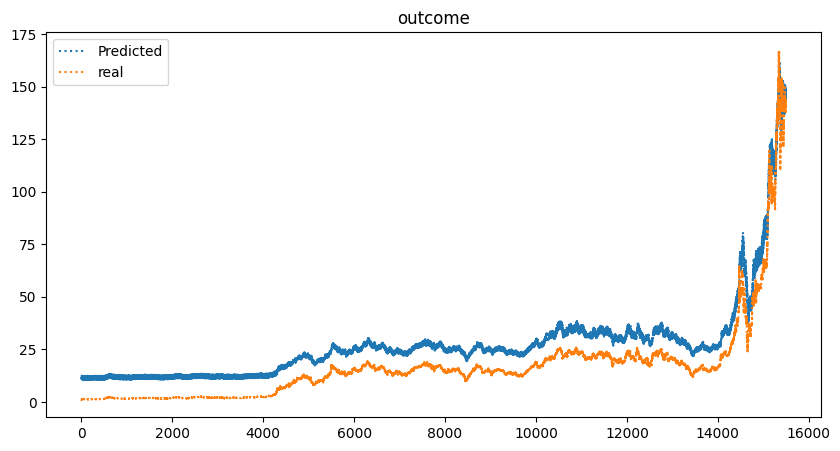

In [229]:
#train
Answer1.plot(title="outcome", figsize=(10,5),linestyle = 'dotted');

In [230]:
Answer2 = pd.DataFrame({
    "Predicted": predict_test.ravel(),
    "real": testy.ravel()
}) 
Answer2.head()

,Predicted,real
0,145.477081,149.926666
1,152.700790,155.300003
2,145.693756,153.766663
3,145.334045,150.103333
4,151.304291,152.190002


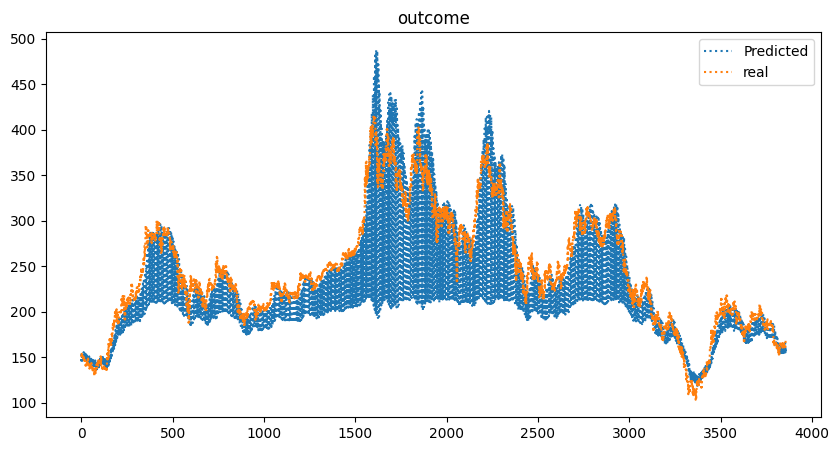

In [231]:
#test
Answer2.plot(title="outcome", figsize=(10,5),linestyle = 'dotted');

# evaluate model

In [232]:
#run anew the cell
n_step_in , n_step_out = 4 , 2 #timestep or look_up

train_x , train_y = create_dataset(train, n_step_in, n_step_out)
test_x , test_y = create_dataset(test, n_step_in, n_step_out)

In [233]:
model.evaluate(test_x, test_y)

21/21 [==============================] - 1s 4ms/step - loss: 0.0122


0.012197989970445633

In [234]:
test_x.shape , test_y.shape

((643, 4, 3), (643, 2, 3))

In [235]:
test_ = array([[0.65318238, 0.60821794, 0.64699902, 0.65896666],
               [0.65318238, 0.60821794, 0.64699902, 0.65896666],
               [0.65318238, 0.60821794, 0.64699902, 0.65896666]])
test_ = test_.reshape(1,n_step_in,n_features)


print(test_.shape,'\n')
print(test_)

(1, 4, 3) 

[[[0.65318238 0.60821794 0.64699902]
  [0.65896666 0.65318238 0.60821794]
  [0.64699902 0.65896666 0.65318238]
  [0.60821794 0.64699902 0.65896666]]]


In [236]:
y_hat = model.predict(test_)
y_hat

1/1 [==============================] - 0s 24ms/step


array([[[0.6377468 , 0.6364412 , 0.6318556 ],
        [0.518262  , 0.49368316, 0.528984  ]]], dtype=float32)

In [237]:
y_hat = y_hat.reshape(-1,3)

In [238]:
y_hat

array([[0.6377468 , 0.6364412 , 0.6318556 ],
       [0.518262  , 0.49368316, 0.528984  ]], dtype=float32)

In [239]:
y_hat = scaler.inverse_transform(y_hat)
y_hat

array([[262.80347, 264.2058 , 259.42963],
       [213.76764, 205.19136, 217.36372]], dtype=float32)

# Thank you...